In [90]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import eigh
from scipy.integrate import quad
from prettytable import PrettyTable

## Часть 1

#### Константы

In [392]:
HBAR = 1.0545718e-34 #
eV = 1.60218e-19 #
m = 9.10938356e-31 #
a = 2e-9 #
U0 = 1 * eV #
L = 2 * a #
N = 1000

#### Пространственная сетка X

In [391]:
x = np.linspace(-L / 2, L / 2, N)
dx = x[1] - x[0]

#### Построение потенциальной энергии V(x)

In [384]:
V = np.zeros_like(x)
for i in range(N):
    if abs(x[i]) < a:
        V[i] = -U0
    else:
        V[i] = 0

#### Коэффициенты гамильтониана (масштабирование)

In [385]:
diag = HBAR**2 / (2 * m * dx**2)
H = np.zeros((N, N))

for i in range(N):
    H[i, i] = 2 * diag + V[i]
    if i > 0:
        H[i, i - 1] = -diag
    if i < N - 1:
        H[i, i + 1] = -diag

#### Поиск собственных значений и векторов (решение уравнения Шрёдингера)

In [386]:
eigvals, eigvecs = eigh(H, subset_by_index=[0, 3]) #матрица
energies = eigvals / eV #собственные значения
eigvecs = eigvecs / np.sqrt(dx) #собственные вектора

#### Анализ связных состояний (E 

In [387]:
bound_states = energies < 0
bound_energies = energies[bound_states]
bound_eigvecs = eigvecs[:, bound_states]

In [388]:
table = PrettyTable()
table.field_names = ["Уровень", "Энергия (эВ)"]
for i, E in enumerate(bound_energies, 1):
    table.add_row([f"n = {i}", f"{E:.3f}"])

In [389]:
print("Уровни энергии внутри потенциальной ямы (в эВ):")
print(table)

Уровни энергии внутри потенциальной ямы (в эВ):
+---------+--------------+
| Уровень | Энергия (эВ) |
+---------+--------------+
+---------+--------------+


In [390]:
zone_mask = np.abs(x) < a
x_zone = x[zone_mask] * 1e9
eigvecs_zone = bound_eigvecs[zone_mask, :]

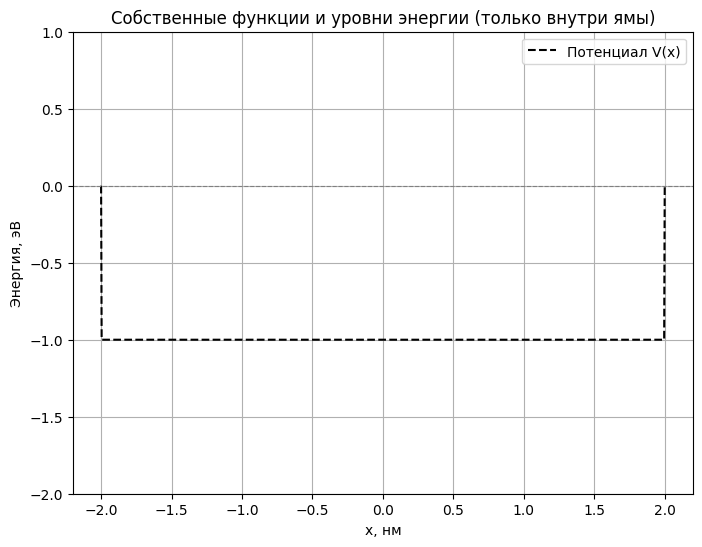

In [373]:
plt.figure(figsize=(8, 6))
for i in range(len(bound_energies)):
    wave_zone = eigvecs_zone[:, i] / np.max(np.abs(eigvecs_zone[:, i])) * 0.25
    plt.plot(x_zone, wave_zone + bound_energies[i], label=f"E[{i+1}]={bound_energies[i]:.3f} эВ")
plt.plot(x * 1e9, V / eV, 'k--', label='Потенциал V(x)')
plt.title("Собственные функции и уровни энергии (только внутри ямы)")
plt.xlabel("x, нм")
plt.ylabel("Энергия, эВ")
plt.ylim(-U0 / eV - 1, 1)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

## Часть 2

In [429]:
# потребуется h_,m,U(x),E,h как ширина интегрирования

U = lambda x: 4.000e-19  # Высота U(x) (высота барьера)
#U = lambda x: 1.000e-19+1e-35  # Значение D: 0.9999999911187604
E = 3.9e-19             # Энергия E
h = 1e-9             # Ширина интегрирования
if(E >= U(x)):
    print('\nP(прохождения барьера) -> 1. Важно учесть, что есть P(отскока от барьера) != 0')
else:
    # Функция для интегрирования
    def integrand(x):
        if x < 0:
            return 0  # U(x) = 0, подкоренное выражение будет отрицательным
        elif 0 <= x <= h:
            return np.sqrt(2 * m * (U(x) - E))  # U(x) = U_0
        else:
            return 0  # U(x) = 0

    # Вычисление интеграла
    integral_value, error = quad(integrand, 0, h)

    # Вычисление D
    D = np.exp((-2 / HBAR) * integral_value)

    print(f"\nЗначение D: {D}")
    print(f"Значение D: {D*100:.2f} %")
    print(f"Разница между U и E {U(x)-E:.8e}")


Значение D: 0.07731687637250399
Значение D: 7.73 %
Разница между U и E 1.00000000e-20
